# Introduction

by: Sri Agung Tirtayasa

dataset: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

# Preparation

In [ ]:
# Import all required library

# Computing, Plot, Data processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Utilities
from google.colab import files
import time

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# Algorithms for model
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Upload kaggle credentials

files.upload()

In [ ]:
# Make directory for credentials and dataset

!mkdir -p ~/.kaggle
!mkdir -p dataset
!mv ./kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
# Download dataset https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

!kaggle datasets download -d sagnik1511/car-insurance-data

  0% 0.00/222k [00:00<?, ?B/s]
100% 222k/222k [00:00<00:00, 90.6MB/s]


In [ ]:
!unzip car-insurance-data.zip -d ./dataset

Archive:  car-insurance-data.zip
  inflating: ./dataset/Car_Insurance_Claim.csv  


In [ ]:
dataset = pd.read_csv('./dataset/Car_Insurance_Claim.csv')
dataset.tail(10)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9990,302403,16-25,female,majority,0-9y,high school,working class,0.502120,1.0,before 2015,0.0,1.0,32765,10000.0,sedan,0,0,0,1.0
9991,67445,26-39,male,majority,10-19y,university,upper class,0.705228,1.0,after 2015,0.0,0.0,10238,15000.0,sedan,0,0,1,0.0
9992,188300,65+,male,majority,10-19y,university,upper class,0.542105,1.0,before 2015,1.0,1.0,10238,8000.0,sedan,0,0,2,0.0
9993,156495,26-39,male,majority,10-19y,university,upper class,0.695466,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,4,1,0,0.0
9994,752887,26-39,male,majority,10-19y,high school,middle class,0.454300,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,1,0,2,0.0
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


# Data Understanding

Features:

1. ID: ID dari setiap data
2. AGE: Umur pelanggan, dibedakan menjadi beberapa kategori dari rentang umur:

  - 16-25 Tahun
  - 26-39 Tahun
  - 40-64 Tahun
  - 65+ Tahun

3. GENDER: Jenis kelamin pelanggan
4. RACE: Ras pelanggan dibagi menjadi 2 Mayoritas dan Minoritas
5. DRIVING_EXPERIENCE: Pengalaman berkendara dari pelanggan, dibagi menjadi beberapa kategori dari tahun pengalaman:

  - 0-9 Tahun
  - 10-19 Tahun
  - 20-29 Tahun
  - 30+ Tahun

6. EDUCATION: Pendidikan terakhir pelanggan, dibagi menjadi 3 kategori:

  - None: tidak ada atau tidak terdata
  - Highschool (SMA)
  - University (Kuliah)

7. INCOME: Pendapatan pelanggan, dibagi menjadi 4 kategori:

  - Proverty (Rakyat kelas bawah/miskin)
  - Middle Class (Rakyat kelas menengah kebawah)
  - Working Class (Rakyat kelas menengah keatas)
  - Upper Class (Rakyat kelas atas/kaya)

8. CREDIT_SCORE: Seberapa besar kemungkinan Anda mengajukan klaim
9. VEHICLE_OWNERSHIP: Kepemilikan kendaraan
10. VEHICLE_YEAR: Tahun keluaran mobil, dibedakan manjadi sebelum 2015 dan setelah 2015
11. MARRIED: Status nikah pelanggan
12. CHILDREN: Jumlah anak pelanggan
13. POSTAL_CODE: Kode pos pelanggan
14. ANNUAL_MILEAGE: Jarak tempuh mobil tahunan
15. VEHICLE_TYPE: Tipe mobil dibagi menjadi sedan dan mobil sport
16. SPEEDING_VIOLATIONS: Jumlah riwayat pelanggaran melewati batas kecepatan jalanan
17. DUIS: (*Driving Under Influence*) Jumlah riwayat pelanggan mengandarai sambil mabok dsb.
18. PAST_ACCIDENTS: Jumlah riwayat kecelakaan pelanggan
19. OUTCOME: Penerima asuransi

In [ ]:
dataset.info()e

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

# EDA

In [ ]:
dataset.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [ ]:
dataset.drop(['ID'], axis=1, inplace=True)
dataset.shape

(10000, 18)

In [ ]:
dataset.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [ ]:
dataset.isnull().any()

AGE                    False
GENDER                 False
RACE                   False
DRIVING_EXPERIENCE     False
EDUCATION              False
INCOME                 False
CREDIT_SCORE            True
VEHICLE_OWNERSHIP      False
VEHICLE_YEAR           False
MARRIED                False
CHILDREN               False
POSTAL_CODE            False
ANNUAL_MILEAGE          True
VEHICLE_TYPE           False
SPEEDING_VIOLATIONS    False
DUIS                   False
PAST_ACCIDENTS         False
OUTCOME                False
dtype: bool

Terdapat data kosong pada dataset sebesar 1851 baris

Ada beberapa cara untuk mengatasi baris yang kosong seperti mengisi dengan nilai MEAN, MEDIAN dll.

Tapi sekarang kita gunakan teknik termudah yaitu cukup dengan menghapus semua baris data yang kosong

In [ ]:
nan_rows = dataset[dataset['CREDIT_SCORE'].isnull() | dataset['ANNUAL_MILEAGE'].isnull()]
nan_rows

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
13,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
15,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,10238,NaN,sedan,0,0,0,0.0
16,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,32765,NaN,sedan,10,2,1,0.0
17,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
18,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,65+,male,minority,0-9y,none,upper class,0.710640,1.0,after 2015,0.0,1.0,32765,NaN,sedan,0,0,0,0.0
9981,26-39,male,majority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
9985,16-25,male,minority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
9988,26-39,male,majority,10-19y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,10238,NaN,sedan,1,0,2,1.0


In [ ]:
# Drop NA values

dataset = dataset.dropna(how="any", axis=0)
dataset.isnull().any()

AGE                    False
GENDER                 False
RACE                   False
DRIVING_EXPERIENCE     False
EDUCATION              False
INCOME                 False
CREDIT_SCORE           False
VEHICLE_OWNERSHIP      False
VEHICLE_YEAR           False
MARRIED                False
CHILDREN               False
POSTAL_CODE            False
ANNUAL_MILEAGE         False
VEHICLE_TYPE           False
SPEEDING_VIOLATIONS    False
DUIS                   False
PAST_ACCIDENTS         False
OUTCOME                False
dtype: bool

In [ ]:
dataset.shape

(8149, 18)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8149 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  8149 non-null   object 
 1   GENDER               8149 non-null   object 
 2   RACE                 8149 non-null   object 
 3   DRIVING_EXPERIENCE   8149 non-null   object 
 4   EDUCATION            8149 non-null   object 
 5   INCOME               8149 non-null   object 
 6   CREDIT_SCORE         8149 non-null   float64
 7   VEHICLE_OWNERSHIP    8149 non-null   float64
 8   VEHICLE_YEAR         8149 non-null   object 
 9   MARRIED              8149 non-null   float64
 10  CHILDREN             8149 non-null   float64
 11  POSTAL_CODE          8149 non-null   int64  
 12  ANNUAL_MILEAGE       8149 non-null   float64
 13  VEHICLE_TYPE         8149 non-null   object 
 14  SPEEDING_VIOLATIONS  8149 non-null   int64  
 15  DUIS                 8149 non-null   i

In [ ]:
dataset.nunique()

AGE                       4
GENDER                    2
RACE                      2
DRIVING_EXPERIENCE        4
EDUCATION                 3
INCOME                    4
CREDIT_SCORE           8149
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
MARRIED                   2
CHILDREN                  2
POSTAL_CODE               4
ANNUAL_MILEAGE           21
VEHICLE_TYPE              2
SPEEDING_VIOLATIONS      21
DUIS                      7
PAST_ACCIDENTS           15
OUTCOME                   2
dtype: int64

In [ ]:
dataset.select_dtypes('int').describe()

,POSTAL_CODE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,8149.000000,8149.000000,8149.000000,8149.000000
mean,19725.567922,1.485581,0.240766,1.065530
std,18784.308198,2.244711,0.557408,1.665623
min,10238.000000,0.000000,0.000000,0.000000
25%,10238.000000,0.000000,0.000000,0.000000
50%,10238.000000,0.000000,0.000000,0.000000
75%,32765.000000,2.000000,0.000000,2.000000
max,92101.000000,22.000000,6.000000,15.000000


In [ ]:
dataset.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Mayoritas data merupakan data kategorikal

Kita pisahkah kategorikan dengan numerikal berdasarkan jumlah unique valuenya

Numerical features = unique values >= 15

In [ ]:
numerical = ['SPEEDING_VIOLATIONS', 'ANNUAL_MILEAGE', 'PAST_ACCIDENTS', 'CREDIT_SCORE']
categorical = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'VEHICLE_TYPE', 'DUIS', 'RACE']

Sebaran data pada fitur target ternyata tidak seimbang walaupun tidak terlalu besar (*imbalance*)

31.1 % dapat asuransi

68.9 % tidak dapat asuransi

Pada saat data preprocessing nanti akan kita handle menggunakan teknik *Oversampling*

Accepted insurance 5613
Rejected insurance 2536


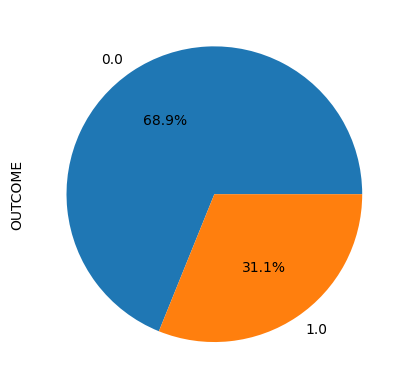

In [ ]:
# Plot target ratio to pie chart
# 1: Accepted
# 0: Rejected

outcome = dataset['OUTCOME'].value_counts()
outcome.plot.pie(autopct='%1.1f%%')
accept, reject = outcome
print(f"Accepted insurance {accept}")
print(f"Rejected insurance {reject}")

In [ ]:
dataset.loc[:, numerical]

,SPEEDING_VIOLATIONS,ANNUAL_MILEAGE,PAST_ACCIDENTS,CREDIT_SCORE
0,0,12000.0,0,0.629027
1,0,16000.0,0,0.357757
2,0,11000.0,0,0.493146
3,0,11000.0,0,0.206013
4,2,12000.0,1,0.388366
...,...,...,...,...
9994,1,16000.0,2,0.454300
9995,0,16000.0,1,0.582787
9997,0,14000.0,0,0.470940
9998,2,13000.0,1,0.364185


In [ ]:
y = dataset['OUTCOME']
X = dataset.drop('OUTCOME', axis=1)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SPEEDING_VIOLATIONS'),
  Text(1, 0, 'ANNUAL_MILEAGE'),
  Text(2, 0, 'PAST_ACCIDENTS'),
  Text(3, 0, 'CREDIT_SCORE')])

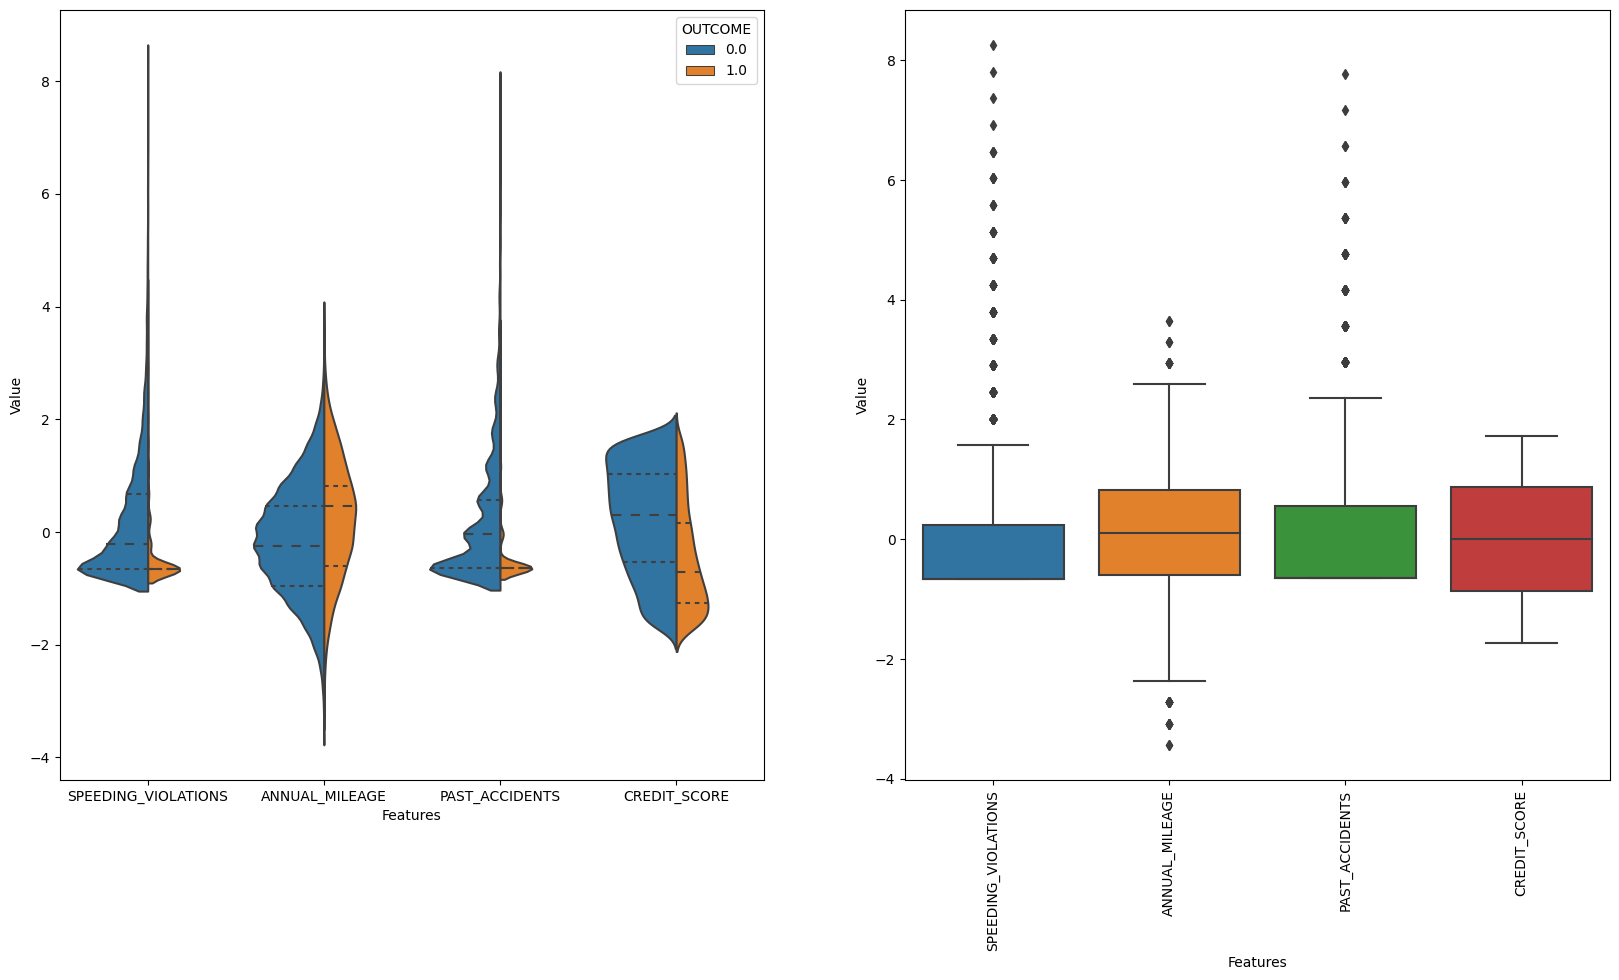

In [ ]:
data = X[numerical]
data = (data-data.mean()) / (data.std())
data = pd.melt(
    pd.concat([data, y], axis=1),
    id_vars="OUTCOME",
    var_name="Features",
    value_name="Value",
)

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.violinplot(x="Features", y="Value", hue="OUTCOME", data=data, split=True, inner="quart", ax=ax[0], scale='count', scale_hue=True)
sns.boxplot(x="Features", y="Value", data=data, ax=ax[1])
plt.xticks(rotation=90)

- Dari visualisasi violinplot diatas perbedaan atara penerima asuransi dan yang bukan penerima tidak terklasifikasikan dengan baik
- Pada visualisasi boxplot terlihat ada outliers pada dataset, kita tidak akan menghilangkan outliers karena dapat menghilangkan data di beberapa fitur


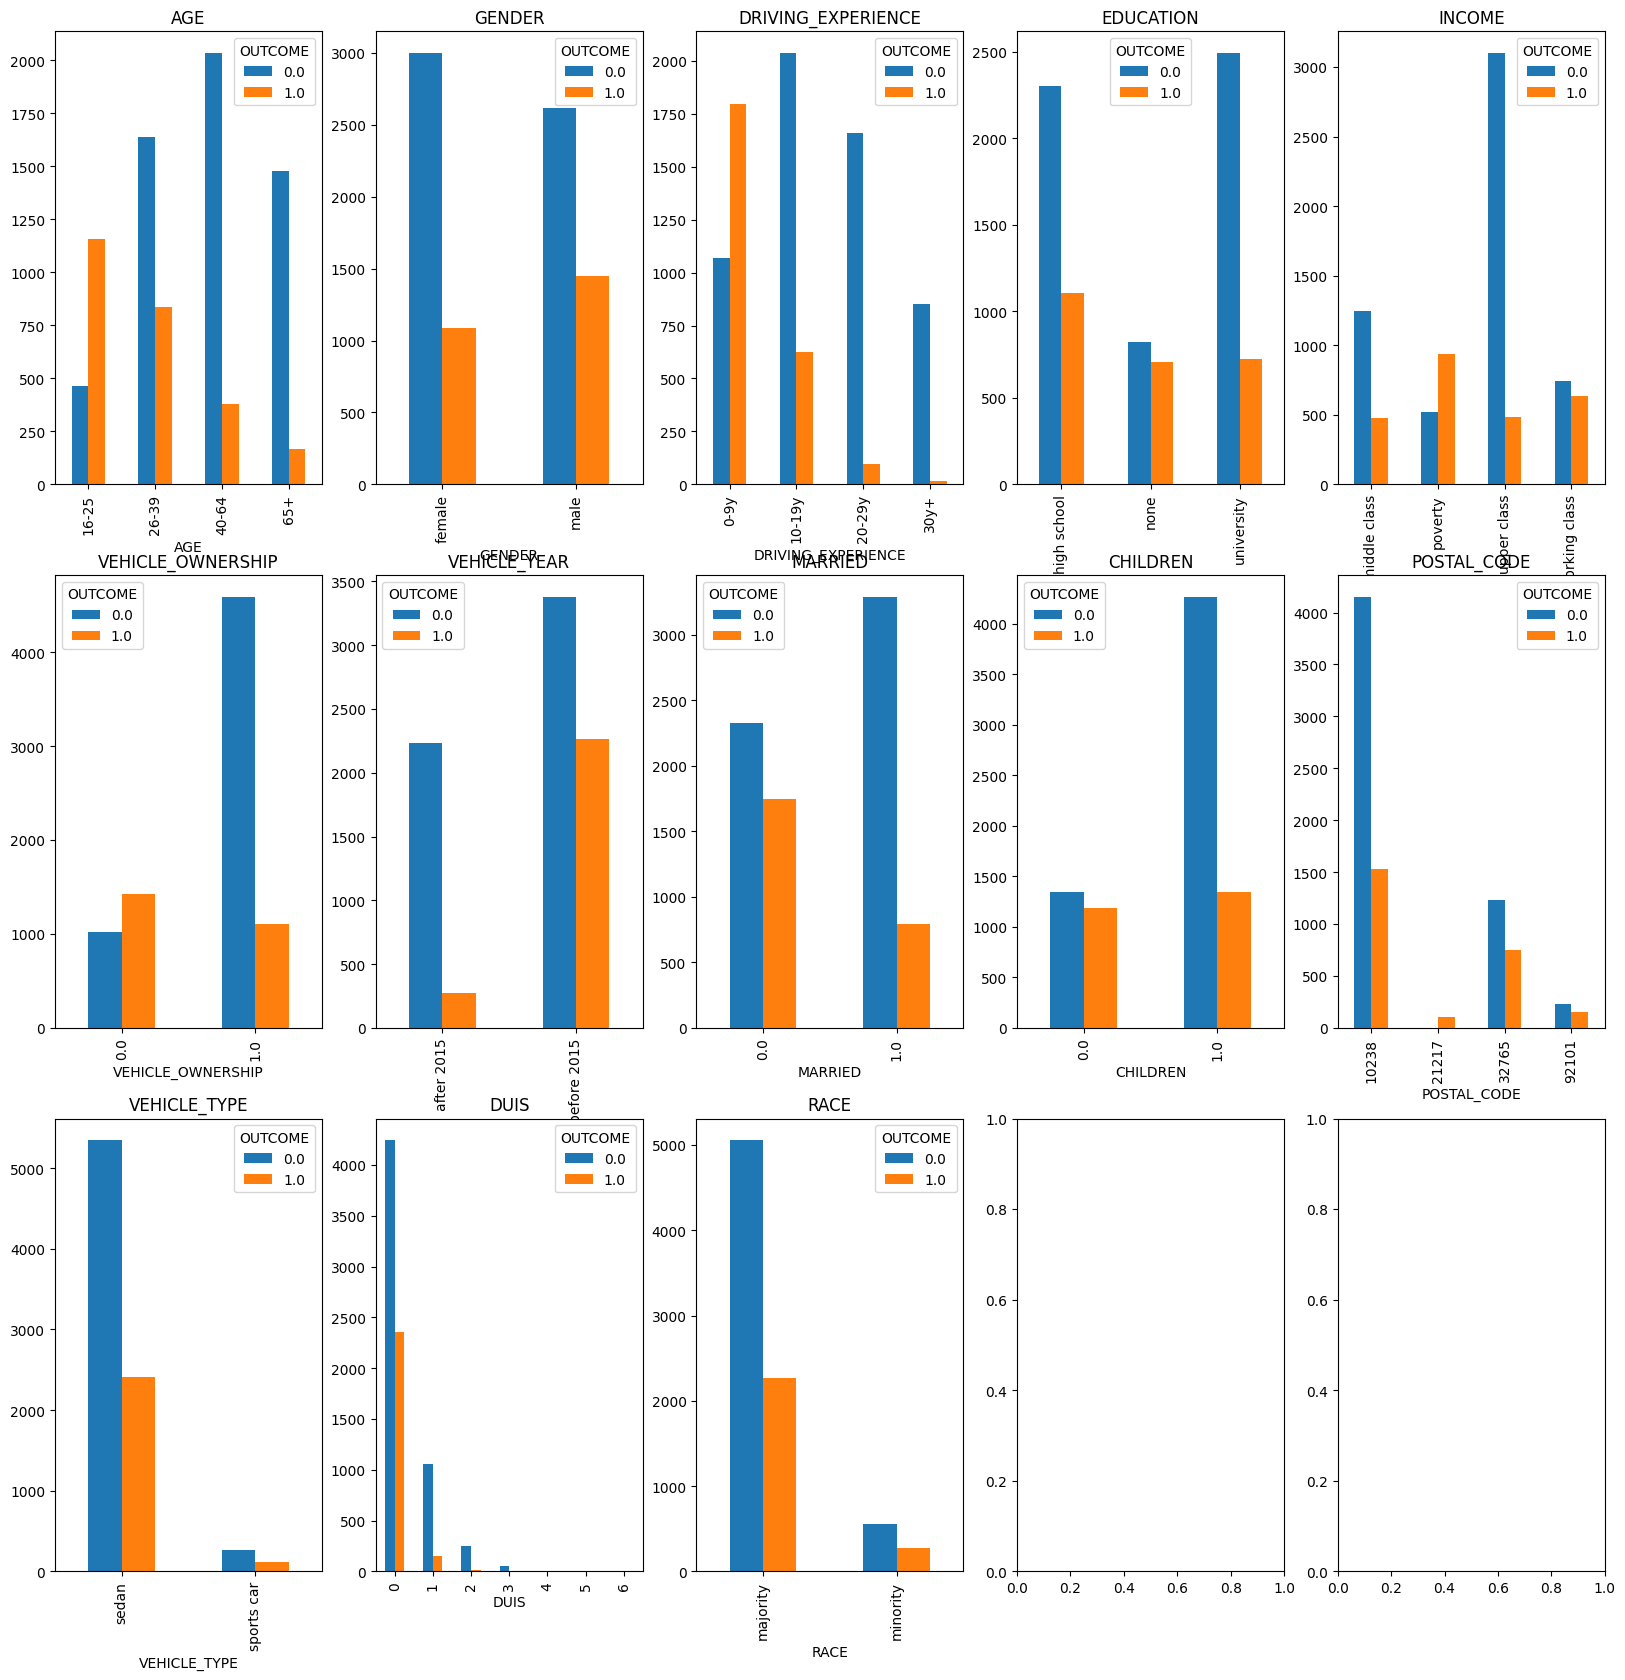

In [ ]:
f, ax = plt.subplots(3, 5, figsize=(20, 20))

for i, feature in enumerate(categorical):
  pd.crosstab(X[feature], y).plot(kind='bar', title=feature, ax=ax[i // 5][i % 5])

- Pada fitur AGE terlihat pada kategori umur rentang 15-24 peluang untuk mendapatkan asuransi mobil cukup tinggi, dan semakin besar umur semakin kecil
- Pada fitur DRIVING_EXPERIENCE terlihat pada kategori 0-9 tahun pengalaman berkendara berpeluang mendapatkan asuransi, semakin berpengalaman semakin kecil peluang mendapatkan asuransi
- Begitu juga pada fitur INCOME, untuk kategori '*proverty*' terlihat berbedaan peluang pendapatan asuransi
- Peluang mendapatkan asuransi lebih besar pada GENDER laki-laki daripada perempuan

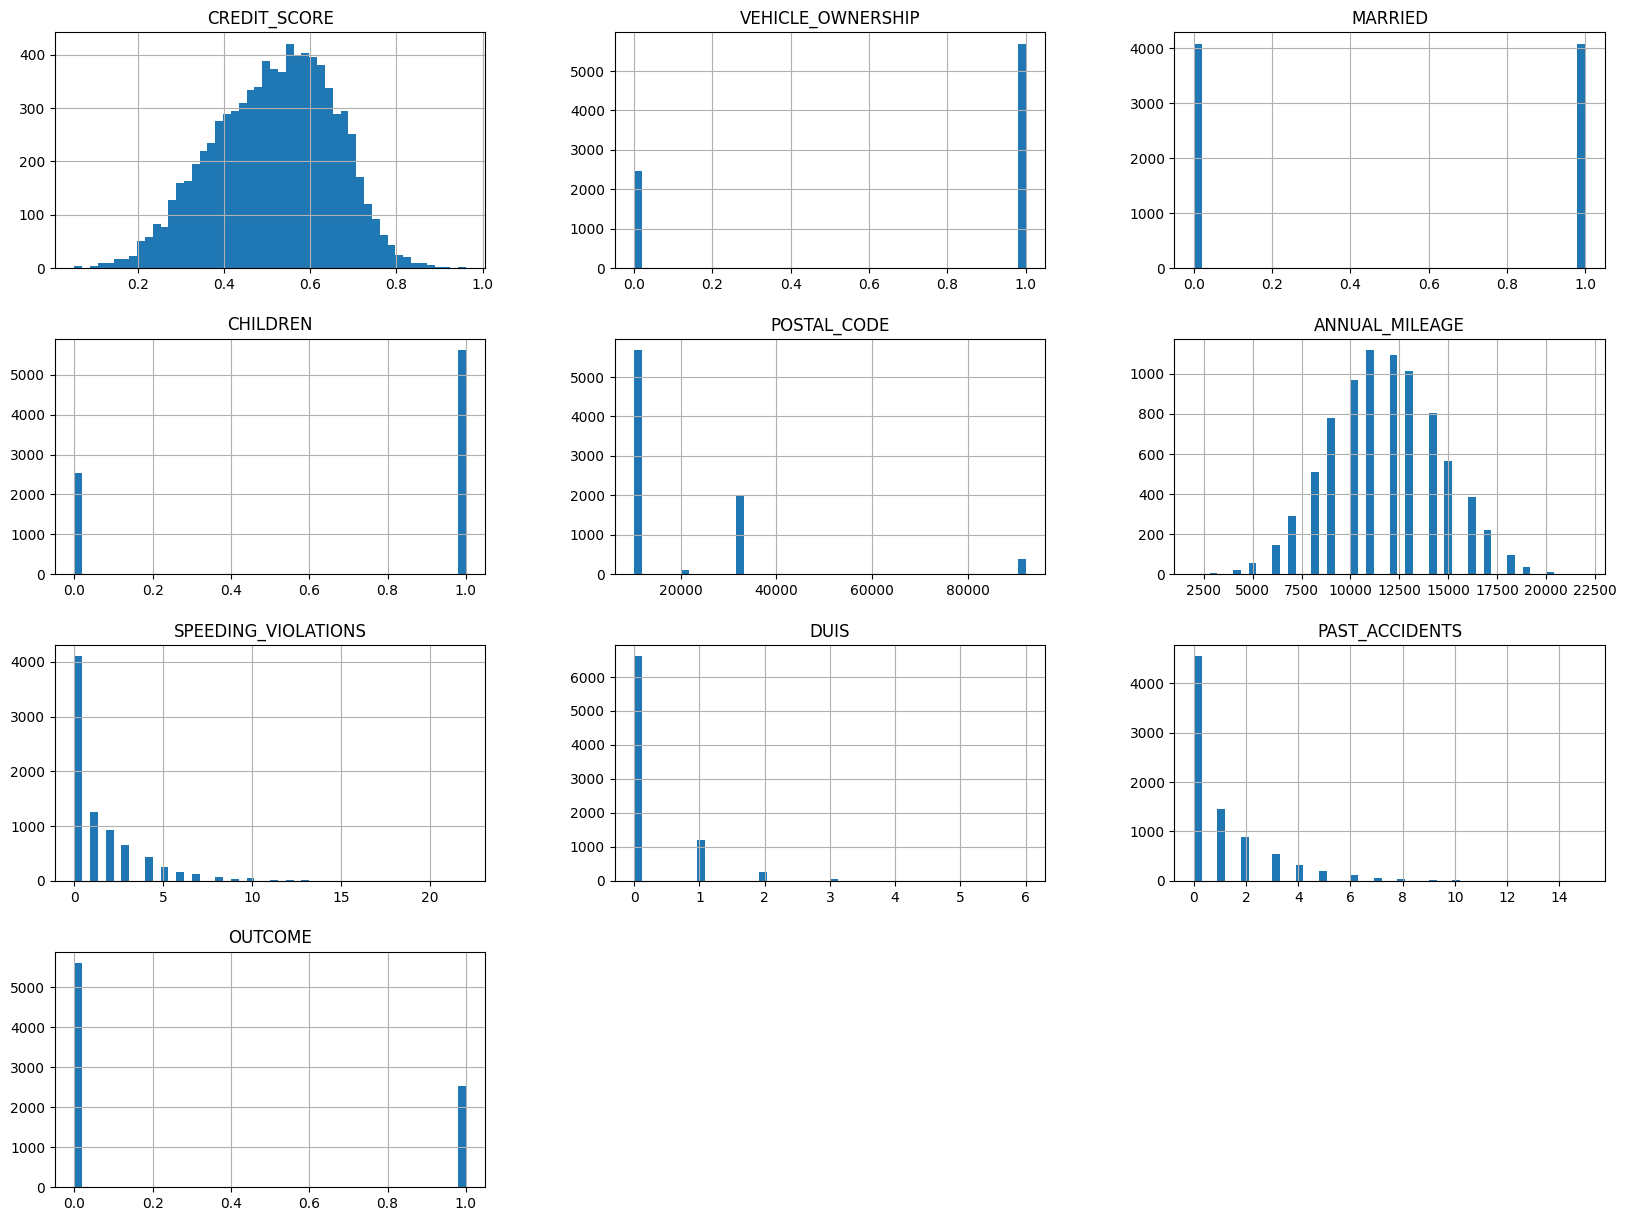

In [ ]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

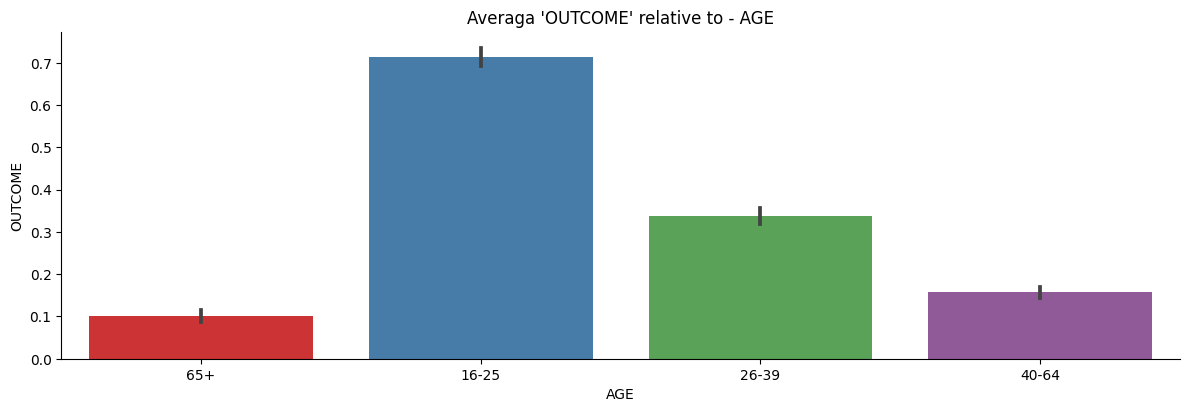

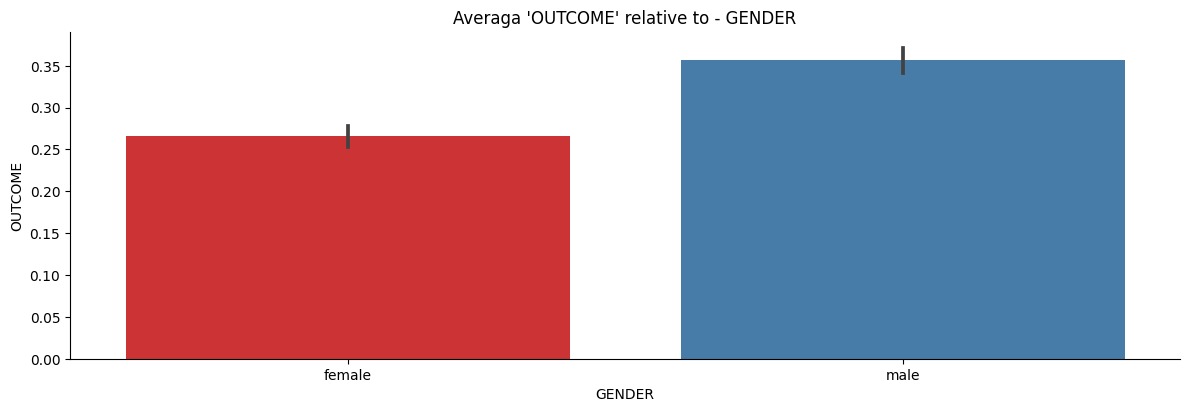

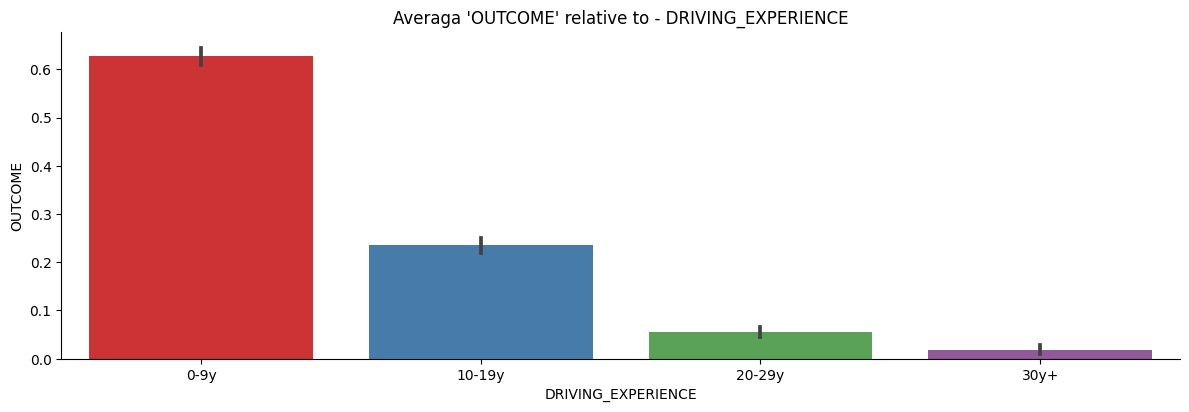

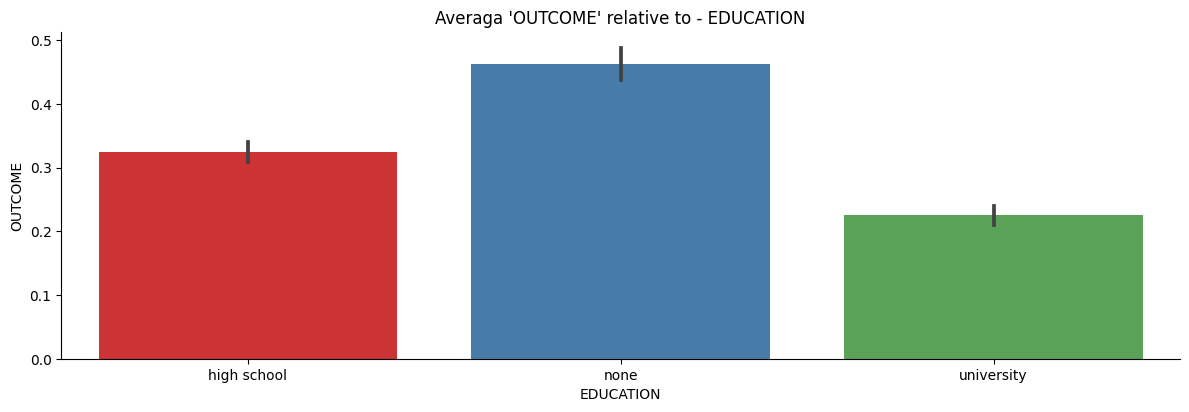

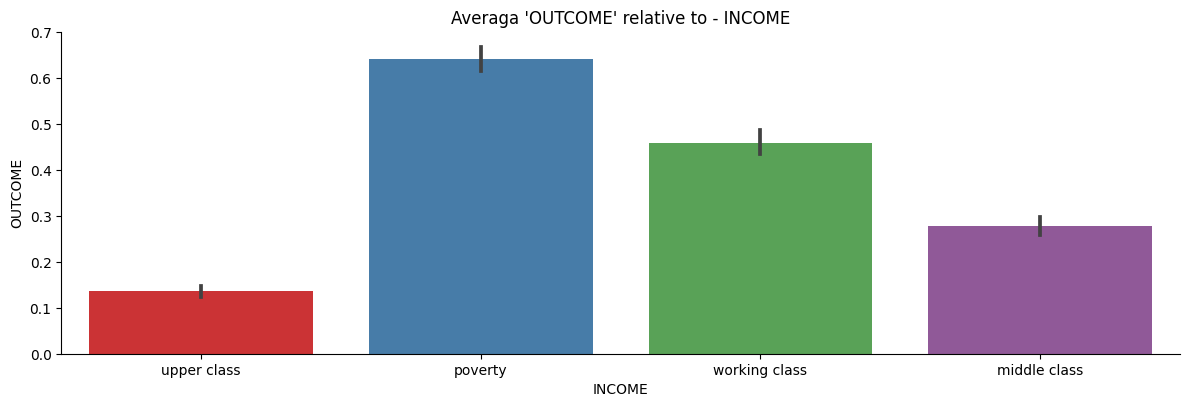

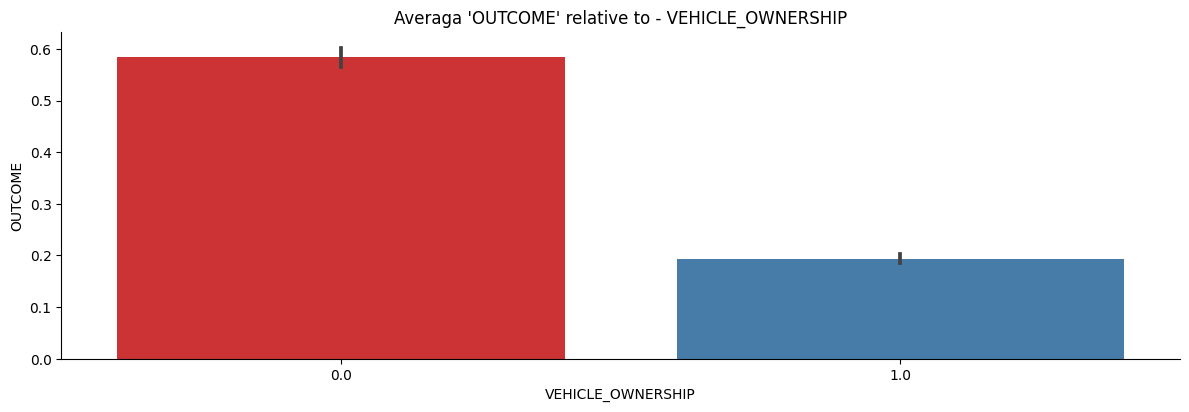

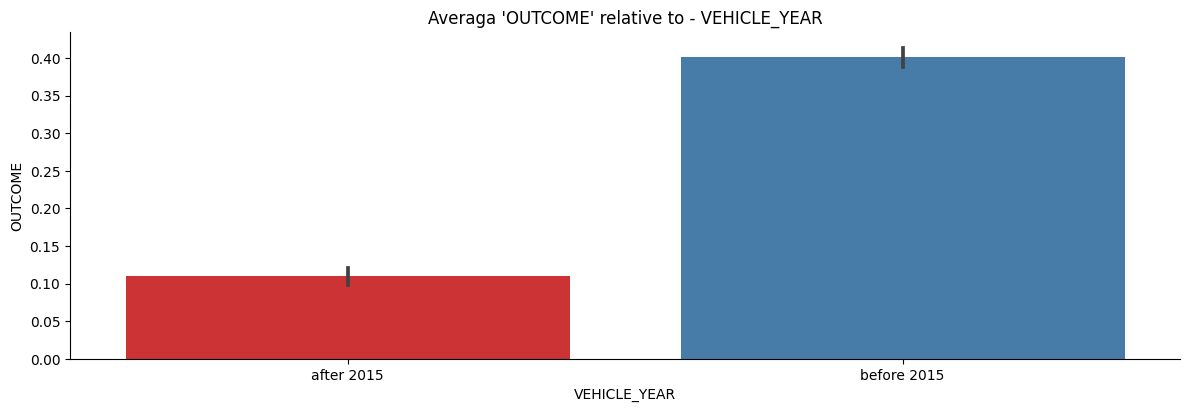

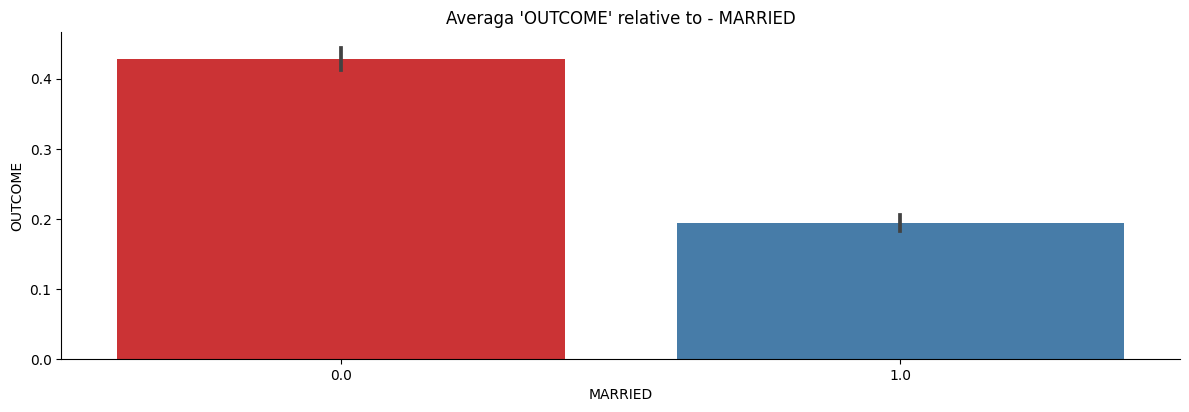

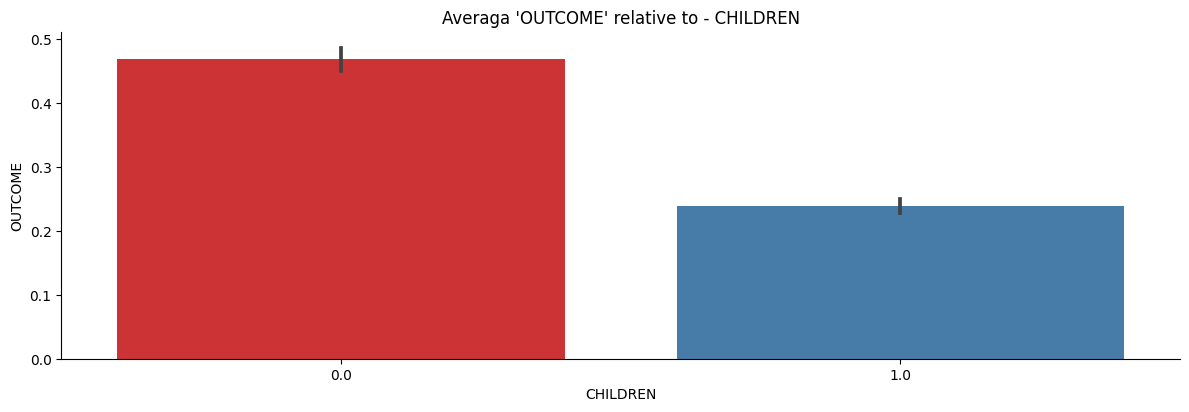

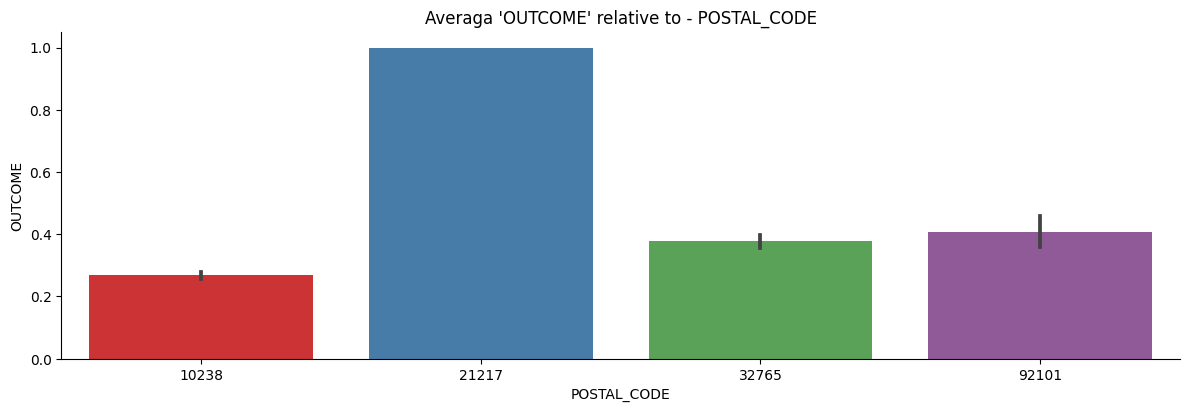

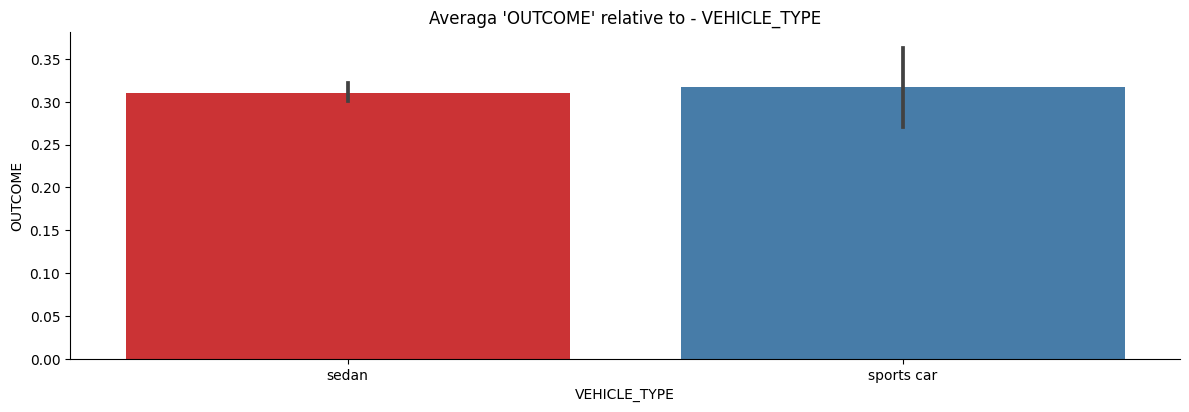

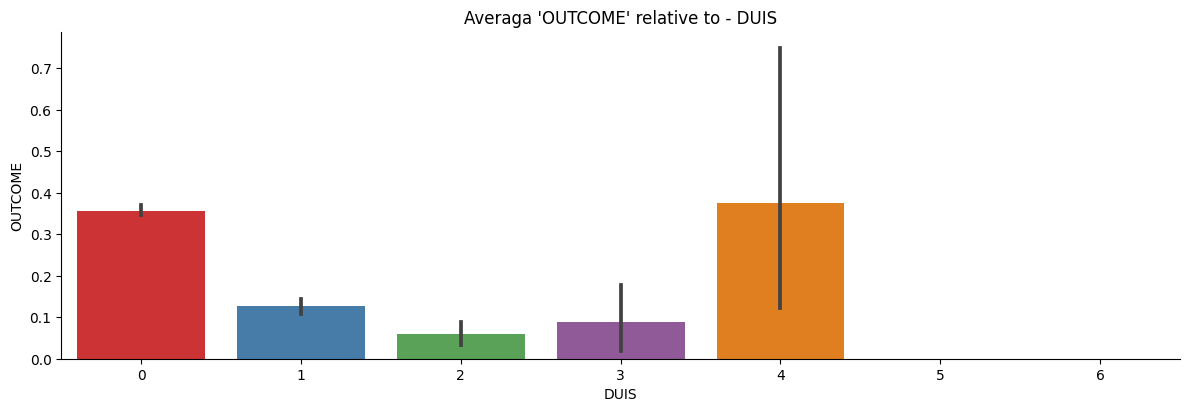

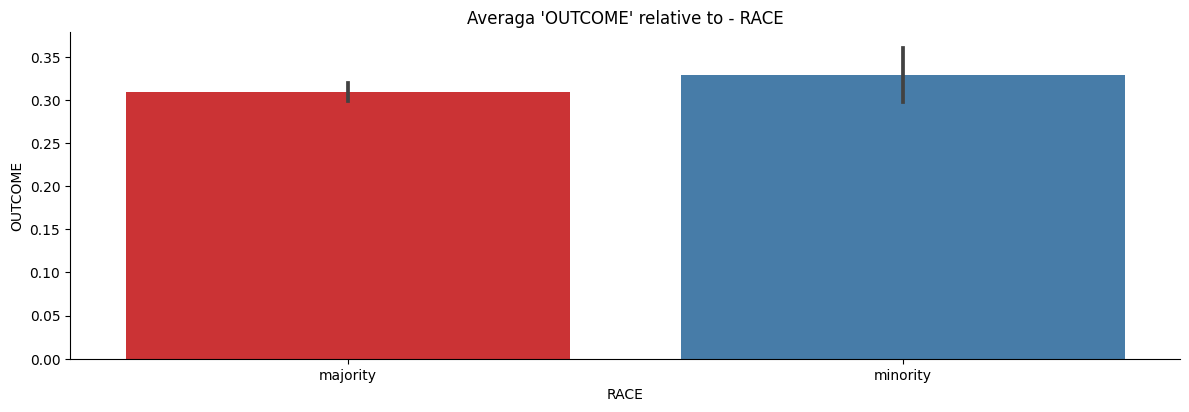

In [ ]:
for col in categorical:
  sns.catplot(x=col, y='OUTCOME', kind='bar', dodge=False, height=4, aspect=3, data=dataset, palette='Set1')
  plt.title("Averaga 'OUTCOME' relative to - {}".format(col))

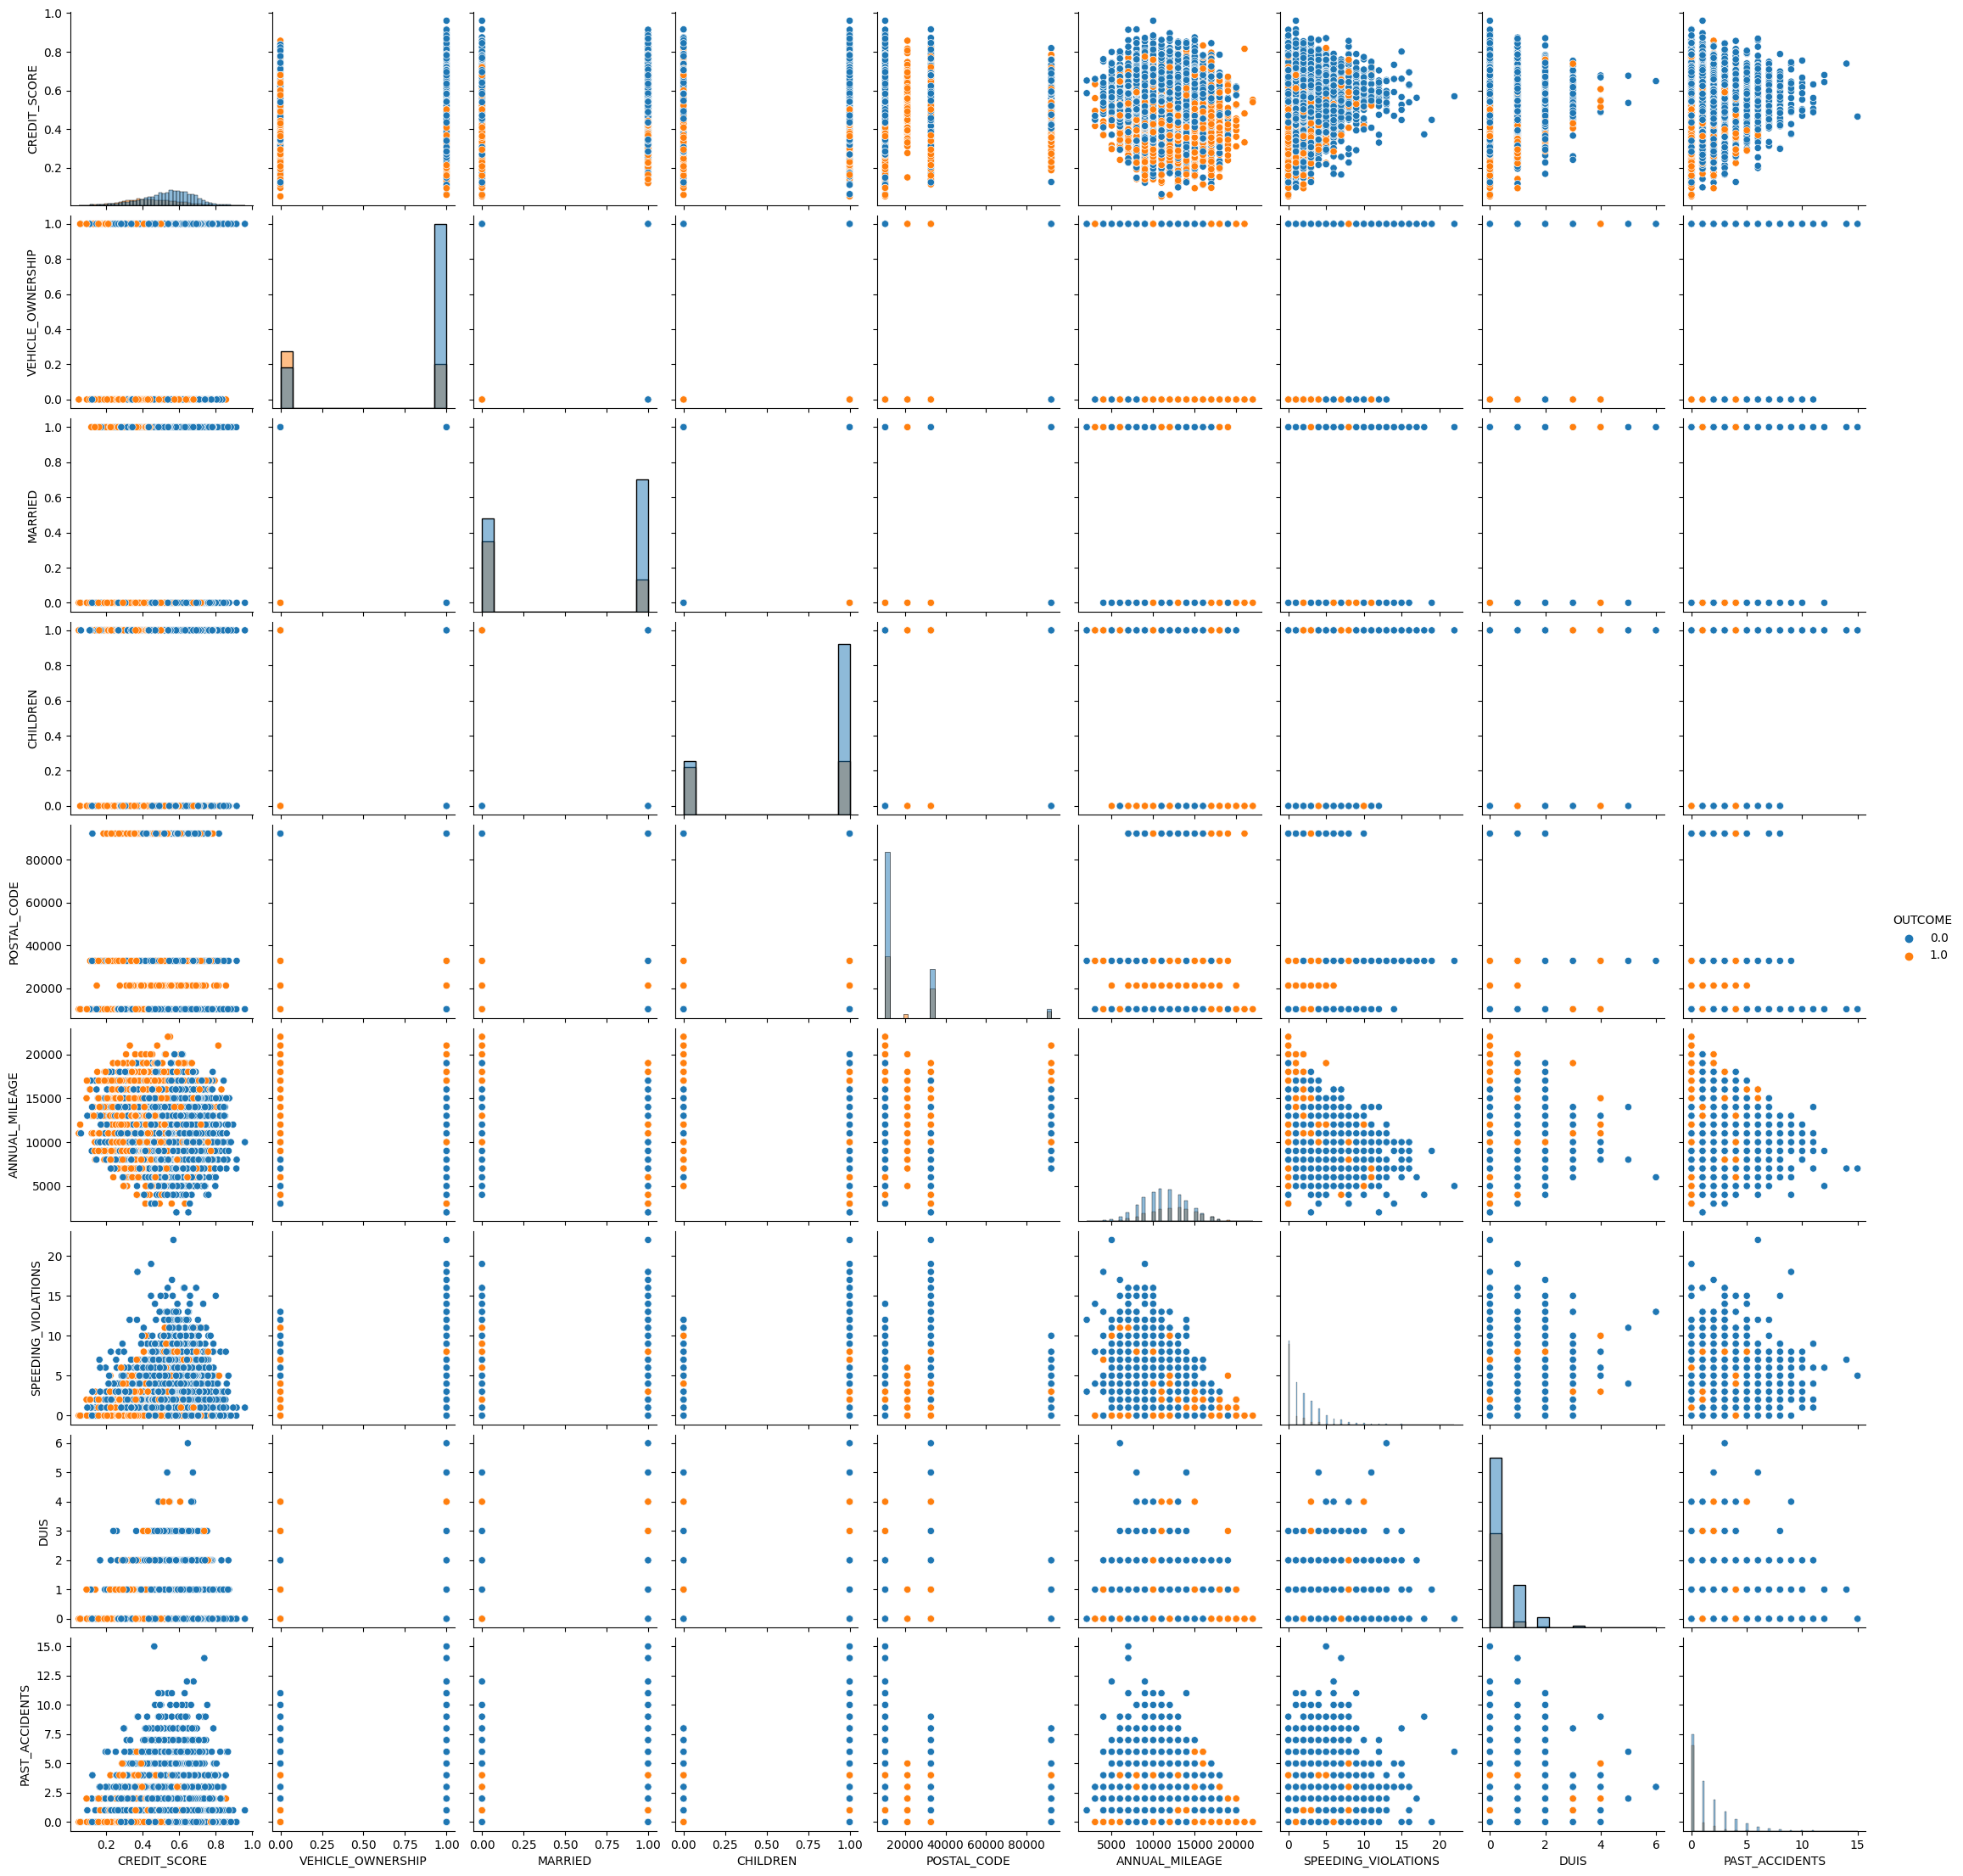

In [ ]:
sns.pairplot(dataset, diag_kind='hist', hue='OUTCOME')

In [ ]:
le = LabelEncoder()

for col in numerical:
  X[col] = le.fit_transform(X[col])

for col in categorical:
  X = pd.concat([X, pd.get_dummies(X[col], prefix=col)], axis=1)

X.drop(categorical, axis=1, inplace=True)
X

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,...,VEHICLE_TYPE_sports car,DUIS_0,DUIS_1,DUIS_2,DUIS_3,DUIS_4,DUIS_5,DUIS_6,RACE_majority,RACE_minority
0,6316,10,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1162,14,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,3383,9,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,98,9,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1574,10,2,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2650,14,1,2,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9995,5314,14,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9997,2954,12,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9998,1238,11,2,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


Text(0.5, 1.0, 'Correlation Matrix')

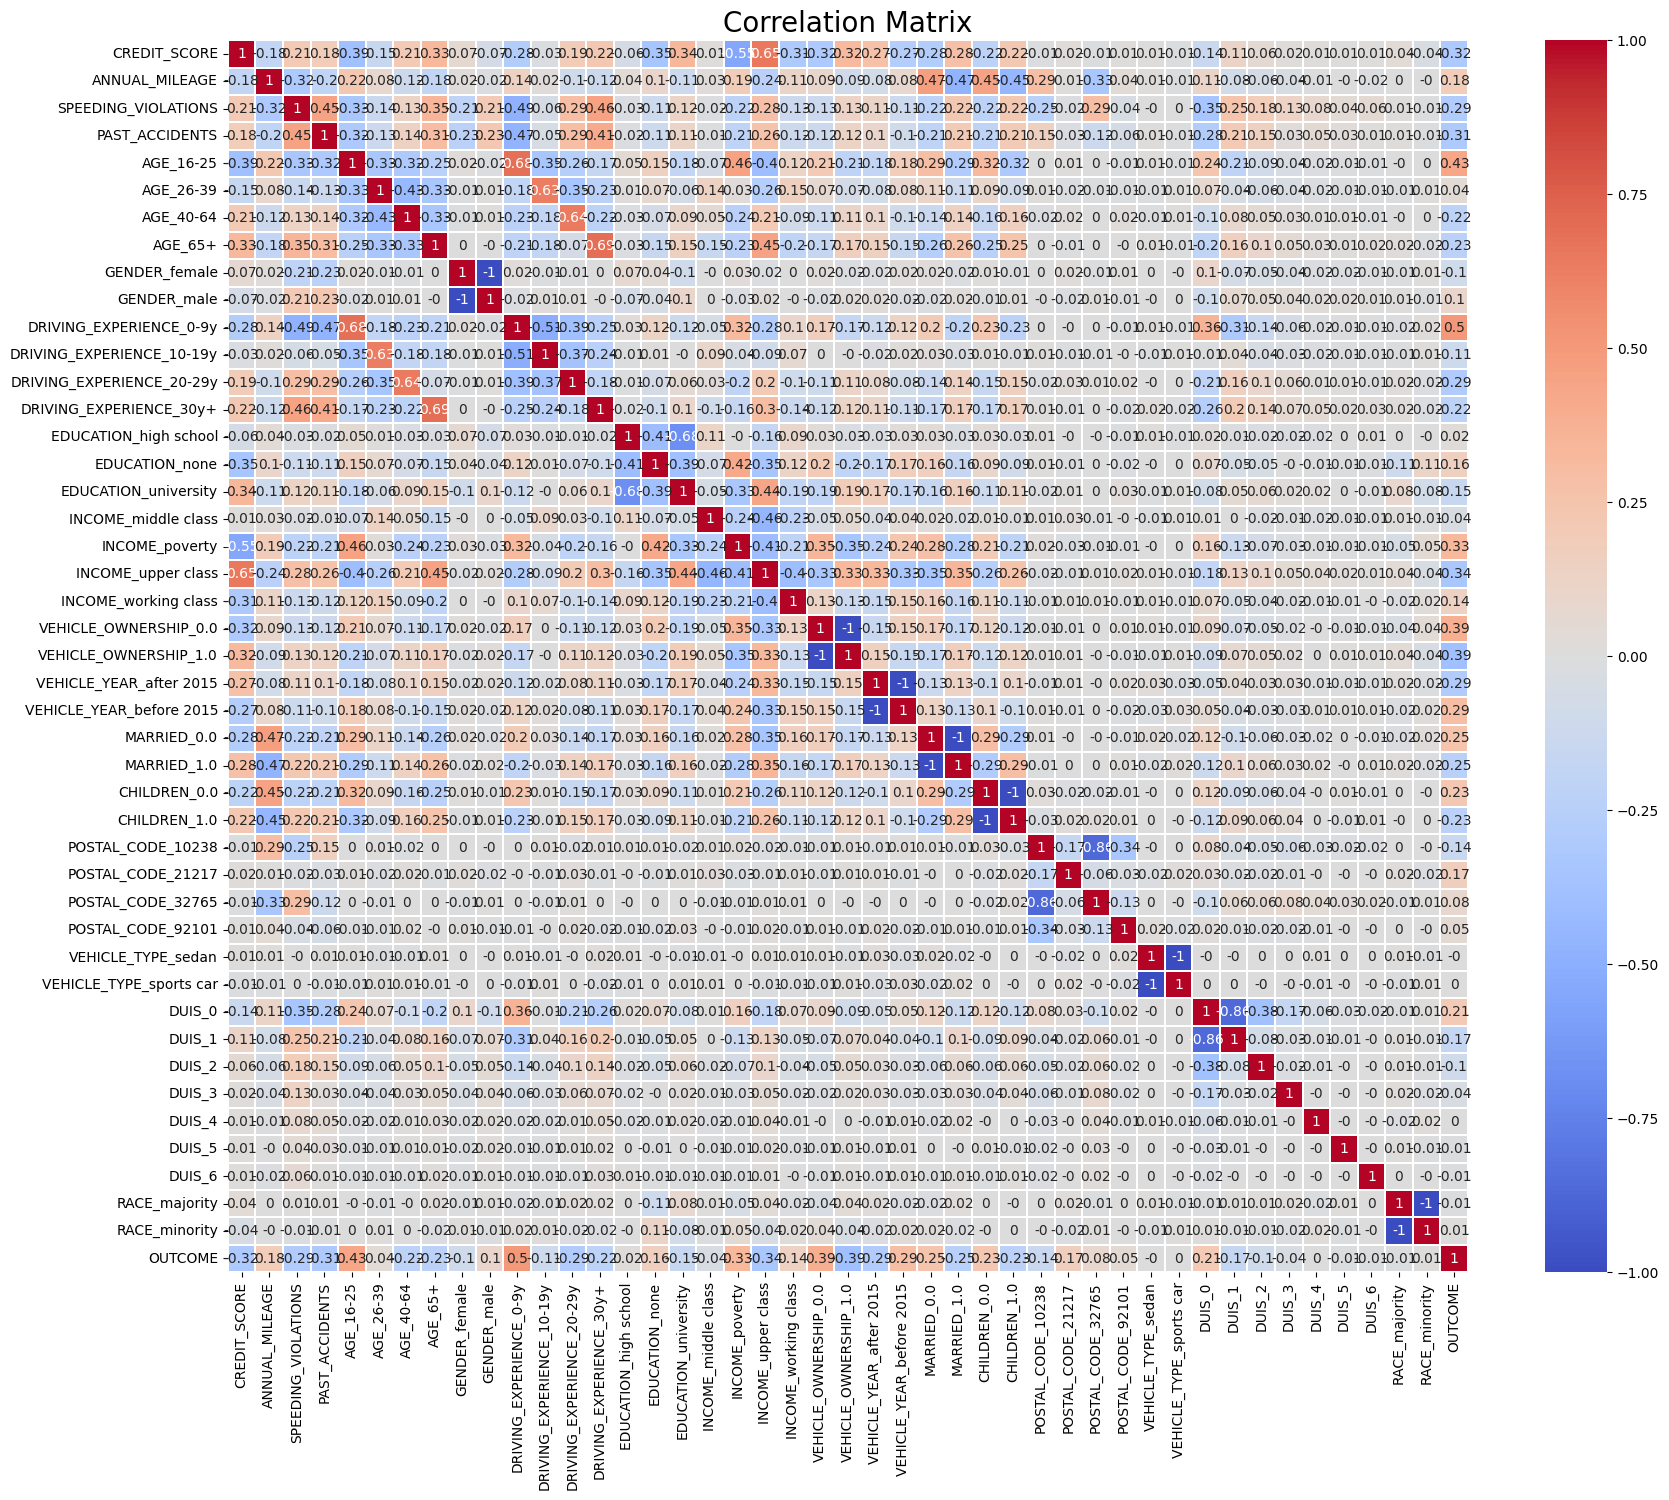

In [ ]:
plt.figure(figsize=(20, 16))
correlation_matrix = pd.concat([X, y], axis=1).corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix', size=20)

Hasil dari correlation matrix terdapat fitur beberapa fitur yang paling kurang berkorelasi dengan OUTCOME yaitu:

- VEHICLE_TYPE_sedan
- VEHICLE_TYPE_sports car
- DUIS_2
- DUIS_3
- DUIS_4
- DUIS_5
- DUIS_6

Pada saat ini kita tidak akan menghapus fitur tersebut, tetapi pada tahap Hyperparameter Tuning kita akan analisa fitur yang paling berpengaruh pada model menggunakan RFECV (*Recursive Feature Elimination with Cross Validation*)

# Data Preparation

In [ ]:
X_copy = X.copy()
X_copy.tail()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,...,VEHICLE_TYPE_sports car,DUIS_0,DUIS_1,DUIS_2,DUIS_3,DUIS_4,DUIS_5,DUIS_6,RACE_majority,RACE_minority
9994,2650,14,1,2,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9995,5314,14,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9997,2954,12,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9998,1238,11,2,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9999,2318,11,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8149 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CREDIT_SCORE               8149 non-null   int64
 1   ANNUAL_MILEAGE             8149 non-null   int64
 2   SPEEDING_VIOLATIONS        8149 non-null   int64
 3   PAST_ACCIDENTS             8149 non-null   int64
 4   AGE_16-25                  8149 non-null   uint8
 5   AGE_26-39                  8149 non-null   uint8
 6   AGE_40-64                  8149 non-null   uint8
 7   AGE_65+                    8149 non-null   uint8
 8   GENDER_female              8149 non-null   uint8
 9   GENDER_male                8149 non-null   uint8
 10  DRIVING_EXPERIENCE_0-9y    8149 non-null   uint8
 11  DRIVING_EXPERIENCE_10-19y  8149 non-null   uint8
 12  DRIVING_EXPERIENCE_20-29y  8149 non-null   uint8
 13  DRIVING_EXPERIENCE_30y+    8149 non-null   uint8
 14  EDUCATION_high school   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.3, random_state=123)

Handle imbalance dataset with oversampling

> **SMOTE (*Synthetic Minority Oversampling Technique*)**
> Teknik SMOTE ini tidak hanya membuat duplikasi dari kelas minoritas, tetapi mengambil fitur target dan juga fitur yang lain (*neighbors*) lalu menghasilkan data baru dari kombinasi tersebut

> https://imbalanced-learn.org/stable/over_sampling.html#smote-variants
> https://www.fromthegenesis.com/smote-synthetic-minority-oversampling-technique/


In [ ]:
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 8149
Total # of sample in train dataset: 7776
Total # of sample in test dataset: 2445


In [ ]:
X_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CREDIT_SCORE,8149.0,4074.000000,2352.558005,0.0,2037.0,4074.0,6111.0,8148.0
ANNUAL_MILEAGE,8149.0,9.693459,2.822351,0.0,8.0,10.0,12.0,20.0
SPEEDING_VIOLATIONS,8149.0,1.485336,2.242576,0.0,0.0,0.0,2.0,20.0
PAST_ACCIDENTS,8149.0,1.065284,1.663716,0.0,0.0,0.0,2.0,14.0
AGE_16-25,8149.0,0.198920,0.399212,0.0,0.0,0.0,0.0,1.0
AGE_26-39,8149.0,0.303718,0.459891,0.0,0.0,0.0,1.0,1.0
AGE_40-64,8149.0,0.295987,0.456513,0.0,0.0,0.0,1.0,1.0
AGE_65+,8149.0,0.201374,0.401052,0.0,0.0,0.0,0.0,1.0
GENDER_female,8149.0,0.501166,0.500029,0.0,0.0,1.0,1.0,1.0
GENDER_male,8149.0,0.498834,0.500029,0.0,0.0,0.0,1.0,1.0


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

Kita akan menggunakan beberapa algoritma klasifikasi yaitu

- Logistic Regression
- Random Forest
- XGBoost
- Support Vector Classifier (SVC)

Setelah evaluasi base model, kita coba tuning hyperparameter dengan GridSearchCV untuk mencari parameter yang cocok untuk model

Selain itu dikarenakan kita tidak menghapus fitur yang berkorelasi rendah, kita coba validasi dengan RFECV (*Recursive Feature Elimination with Cross Validation*) untuk mencari fitur yang memiliki pengaruh tinggi terhadap model

In [ ]:
LR = LogisticRegression(random_state=200)
LR.fit(X_train, y_train)

LogisticRegression(random_state=200)

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
RF = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=123, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, n_jobs=-1,
                       random_state=123)

In [ ]:
SV = SVC(gamma='auto')
SV.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
accuracy_models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'], columns=['Logistic', 'XGB', 'RandomForest', 'SVC'])
columns = {'Logistic': LR, 'XGB': XGB, 'RandomForest': RF, 'SVC': SV}

In [ ]:
for col, model in columns.items():
  train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(train_pred, y_train)
  accuracy_models.loc['train_accuracy', col] = train_accuracy

  test_pred = model.predict(X_test)
  test_accuracy = accuracy_score(test_pred, y_test)
  accuracy_models.loc['test_accuracy', col] = test_accuracy

In [ ]:
accuracy_models

,Logistic,XGB,RandomForest,SVC
train_accuracy,0.894933,0.972351,0.979552,0.91088
test_accuracy,0.848671,0.832311,0.833538,0.847444


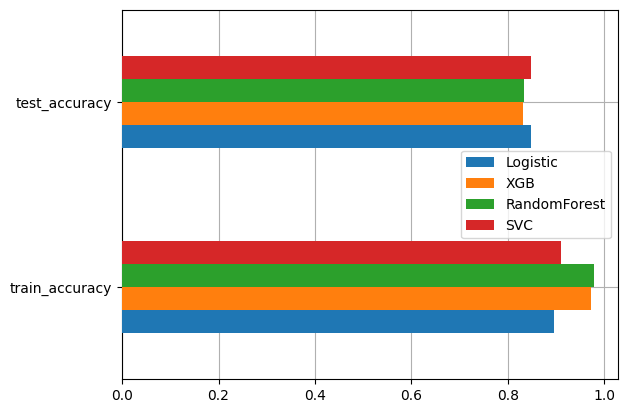

In [ ]:
fig, ax = plt.subplots()
accuracy_models.plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Performa model lumayan bagus untuk algoritma Logistic Regression dan Support Vector Classifier dengan accuracy 84%

# Hyperparameter Tuning

> GridSearchCV merupakan teknik untuk mencari parameter terbaik untuk model. Teknik ini menggunakan Cross Validation untuk mengevaluasi performa dari setiap kombinasi dari parameter. Semakin banyak hyperparameter yang diinputkan semakin lama evaluasi dari grid search

> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Hyperparameter yang akan di-*tuning*:

- max_depth: Kedalaman maksimum dari pohon (*node/tree*)
- n_esimators: Jumlah pohon (*nodes/trees*)
- criterion: Fungsi untuk mengukur kualitas dari percabangan

In [ ]:
parameters = {
    'max_depth': [10, 12, 13],
    'n_estimators': [100, 150, 200],
    'criterion': ['gini','entropy'],
    'random_state': [0]
  }

rf_clf = GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv=3,
    scoring='accuracy',
    verbose=2,
)

rf_clf.fit(X_train, y_train)
rf_clf.best_params_, rf_clf.best_score_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END criterion=gini, max_depth=10, n_estimators=100, random_state=0; total time=   0.4s
[CV] END criterion=gini, max_depth=10, n_estimators=100, random_state=0; total time=   0.4s
[CV] END criterion=gini, max_depth=10, n_estimators=100, random_state=0; total time=   0.4s
[CV] END criterion=gini, max_depth=10, n_estimators=150, random_state=0; total time=   0.6s
[CV] END criterion=gini, max_depth=10, n_estimators=150, random_state=0; total time=   0.6s
[CV] END criterion=gini, max_depth=10, n_estimators=150, random_state=0; total time=   0.6s
[CV] END criterion=gini, max_depth=10, n_estimators=200, random_state=0; total time=   0.8s
[CV] END criterion=gini, max_depth=10, n_estimators=200, random_state=0; total time=   0.8s
[CV] END criterion=gini, max_depth=10, n_estimators=200, random_state=0; total time=   0.9s
[CV] END criterion=gini, max_depth=12, n_estimators=100, random_state=0; total time=   0.6s
[CV] END criterion=

({'criterion': 'gini',
  'max_depth': 10,
  'n_estimators': 100,
  'random_state': 0},
 0.8671553497942387)

In [ ]:
RF_G = RandomForestClassifier(**rf_clf.best_params_)
RF_G.fit(X_train, y_train)

train_pred = RF_G.predict(X_train)
train_accuracy = accuracy_score(train_pred, y_train)

test_pred = RF_G.predict(X_test)
test_accuracy = accuracy_score(test_pred, y_test)

train_accuracy, test_accuracy

(0.9233539094650206, 0.8413087934560327)

Hyperparameter yang akan di-*tuning*:

- max_depth: Kedalaman maksimum dari pohon (*node/tree*)
- learning_rate: Jumlah pengurangan untuk mencegah overfitting
- eval_metric: Evaluasi metric (menggunakan 'error' saja karena untuk binary classification)

In [ ]:
parameters = {
    "max_depth": [ 3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'eval_metric': ['error'],
}

xgb_clf = GridSearchCV(
    XGBClassifier(),
    parameters,
    cv=5,
    scoring='accuracy',
    verbose=2,
)

xgb_clf.fit(X_train, y_train)
xgb_clf.best_params_, xgb_clf.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=3; total time=   0.4s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=3; total time=   0.5s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=3; total time=   0.4s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=3; total time=   0.4s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=3; total time=   0.4s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=4; total time=   0.6s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=4; total time=   0.6s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=4; total time=   0.6s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=4; total time=   0.6s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=4; total time=   0.6s
[CV] END .eval_metric=error, learning_rate=0.01, max_depth=5; total time=   0.7s
[CV] END .eval_metric=error, learning_rate=0.01,

({'eval_metric': 'error', 'learning_rate': 0.1, 'max_depth': 4},
 0.8806666446242737)

In [ ]:
XGB_G = XGBClassifier(**xgb_clf.best_params_)
XGB_G.fit(X_train, y_train)

train_pred = XGB_G.predict(X_train)
train_accuracy = accuracy_score(train_pred, y_train)

test_pred = XGB_G.predict(X_test)
test_accuracy = accuracy_score(test_pred, y_test)

train_accuracy, test_accuracy

(0.9041923868312757, 0.8441717791411043)

Hyperparameter yang akan di-*tuning*:

- C: Parameter regularisasi
- gamma: Koefisien kernel untuk 'rbf', 'poly' dan 'sigmoid'
- kernel: Fungsi untuk mengukur kualitas dari percabangan

In [ ]:
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'gamma': ['auto'],
    'kernel': ['linear','rbf']
}

svc_clf = GridSearchCV(
    SVC(),
    parameters,
    cv=5,
    scoring='accuracy',
    verbose=2,
)

svc_clf.fit(X_train, y_train)
svc_clf.best_params_, svc_clf.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................C=0.25, gamma=auto, kernel=linear; total time=   0.8s
[CV] END ..................C=0.25, gamma=auto, kernel=linear; total time=   0.7s
[CV] END ..................C=0.25, gamma=auto, kernel=linear; total time=   0.6s
[CV] END ..................C=0.25, gamma=auto, kernel=linear; total time=   0.7s
[CV] END ..................C=0.25, gamma=auto, kernel=linear; total time=   0.7s
[CV] END .....................C=0.25, gamma=auto, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.25, gamma=auto, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.25, gamma=auto, kernel=rbf; total time=   0.9s
[CV] END .....................C=0.25, gamma=auto, kernel=rbf; total time=   0.9s
[CV] END .....................C=0.25, gamma=auto, kernel=rbf; total time=   0.9s
[CV] END ...................C=0.5, gamma=auto, kernel=linear; total time=   0.6s
[CV] END ...................C=0.5, gamma=auto, ke

({'C': 0.25, 'gamma': 'auto', 'kernel': 'linear'}, 0.8796390282611032)

In [ ]:
SV_G = SVC(**svc_clf.best_params_)
SV_G.fit(X_train, y_train)

train_pred = SV_G.predict(X_train)
train_accuracy = accuracy_score(train_pred, y_train)

test_pred = SV_G.predict(X_test)
test_accuracy = accuracy_score(test_pred, y_test)

train_accuracy, test_accuracy

(0.8955761316872428, 0.8482617586912066)

Hyperparameter yang akan di-*tuning*:

- C: Inverse dari regularisasi
- max_iter: Jumlah iterasi maksimal

In [ ]:
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'random_state': [0],
    'max_iter': [200, 250, 300],
  }

lr_clf = GridSearchCV(
    LogisticRegression(),
    parameters,
    cv=5,
    scoring='accuracy',
    verbose=2,
)

lr_clf.fit(X_train, y_train)
lr_clf.best_params_, lr_clf.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............C=0.25, max_iter=200, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=200, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=200, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=200, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=200, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=250, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=250, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=250, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=250, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=250, random_state=0; total time=   0.1s
[CV] END ...............C=0.25, max_iter=300, random_state=0; total time=   0.0s
[CV] END ...............C=0.25, max_iter=300, ra

({'C': 0.5, 'max_iter': 200, 'random_state': 0}, 0.8807963365542779)

In [ ]:
LR_G = LogisticRegression(**lr_clf.best_params_)
LR_G.fit(X_train, y_train)

train_pred = LR_G.predict(X_train)
train_accuracy = accuracy_score(train_pred, y_train)

test_pred = LR_G.predict(X_test)
test_accuracy = accuracy_score(test_pred, y_test)

train_accuracy, test_accuracy

(0.8954475308641975, 0.8482617586912066)

**RFECV (*Recursive Feature Elimination with Cross Validation*)**

RFECV merupakan metode feature elimination yang bekerja secara rekursif mengeliminasi fitur dengan menggunakan Cross Validation juga untuk mencari fitur yang paling optimal

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV

In [ ]:
clf_rf_rfecv = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_rfecv, step=1, cv=5, scoring='accuracy', verbose=2)
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_copy.columns[rfecv.support_])

Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 fe

Hasil dari RFECV mendapatkan jumlah fitur yang paling optimal yaitu 37 fitur

Sesuai dengan hasil dari correlation matrix, ada 7 fitur yang paling kurang berkorelasi

# Evaluation

Metrics yang digunakan

- Accuracy: Persentase dari semua prediksi yang diklasifikasikan dengan benar
\begin{array}{rcl}
accuracy & = & \dfrac{TP + TN}{TP + FP + TN + FN}
\end{array}
- Precission: Prediksi positif yang benar relatif terhadap total prediksi positif
\begin{array}{rcl}
precission & = & \dfrac{TP}{TP + FP}
\end{array}
- Recall: Prediksi positif yang benar relatif terhadap positif total
\begin{array}{rcl}
recall & = & \dfrac{TP}{TP + FN}
\end{array}
- F1 Score: Harmony mean dari *pricission* dan *recall*
\begin{array}{rcl}
F1 & = & \dfrac{2 * precission * recall}{precission + recall}
\end{array}
- ROC AUC: Kurva ROC (*Receiver Operating Characteristic*) untuk mengevaluasi ambang batas yang berbeda untuk masalah pembelajaran mesin klasifikasi. AUC (Area Under the Curve) mereprentasikan seluruh area dua dimensi di bawah kurva ROC

- Confusion Matrix: Menentukan tingkat kesalahan dalam prediksi klasifikasi.

Note:
- TP: *True Positive* adalah nilai positif yang diprediksi dengan benar
- TN: *True Negative* adalah nilai negatif yang diprediksi dengan benar
- FP: *False Positive* adalah nilai positif yang diprediksi dengan salah
- FN: *False Negative* adalah nilai negatif yang diprediksi dengan salah

In [ ]:
accuracies = pd.DataFrame(index=['accuracy'], columns=['LogisticRegression', 'RandomForest', 'XGBClassifier', 'SVC'])

In [ ]:
def describe_model(model, model_key):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]
  cm = confusion_matrix(y_test, y_pred)

  print(classification_report(y_test, y_pred))
  print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
  print(f"ROC AUC : {roc_auc_score(y_test, y_prob)}")

  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  accuracy = accuracy_score(y_test, y_pred) * 100
  accuracies.loc['accuracy', model_key] = accuracy

  false_pos_rate, true_pos_rate, tresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(false_pos_rate, true_pos_rate)

  plt.figure(figsize=(5, 5))
  plt.plot(false_pos_rate, true_pos_rate, label="AUC = %0.3f" % roc_auc, color='red')
  plt.legend(loc="lower right")
  plt.axis('tight')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC AUC Curve')
  plt.legend()
  plt.show()

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1725
         1.0       0.74      0.74      0.74       720

    accuracy                           0.85      2445
   macro avg       0.82      0.82      0.82      2445
weighted avg       0.85      0.85      0.85      2445

Accuracy : 0.8482617586912066
ROC AUC : 0.9177077294685991


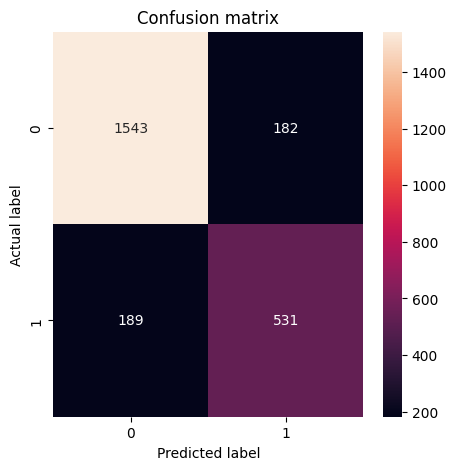

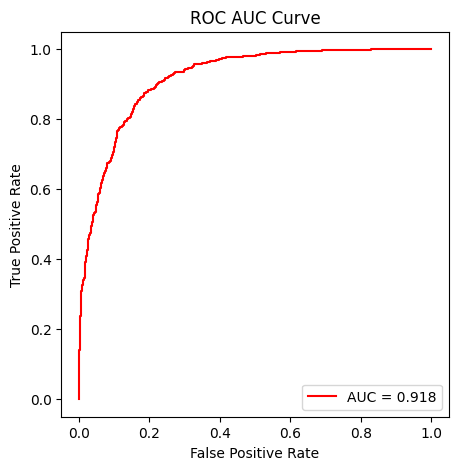

In [ ]:
model = LogisticRegression(**lr_clf.best_params_)
describe_model(model, 'LogisticRegression')

Hasil dari model logistic regression sesudah tuning hyperparameter tidak menunjukan peningkatan pada akurasi model

Confusion matrix menunkukan kesalahan 189 dan 182 pada prediksi

Skor AUC menunjukan hasil yang bagus dengan skor 0.918

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      1725
         1.0       0.72      0.77      0.74       720

    accuracy                           0.84      2445
   macro avg       0.81      0.82      0.81      2445
weighted avg       0.85      0.84      0.84      2445

Accuracy : 0.8413087934560327
ROC AUC : 0.9082801932367149


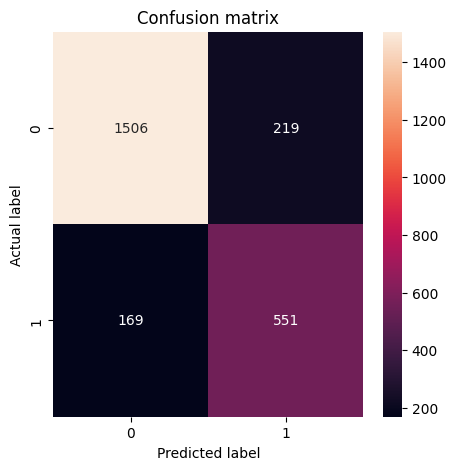

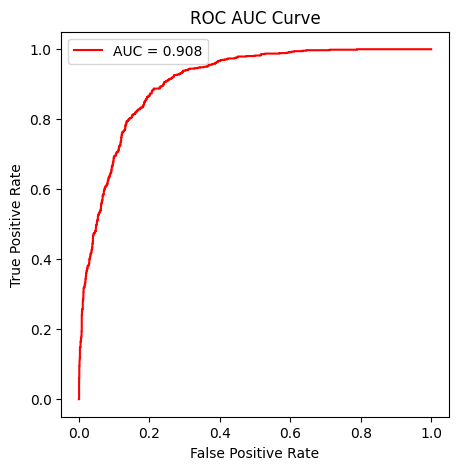

In [ ]:
model = RandomForestClassifier(**rf_clf.best_params_)
describe_model(model, 'RandomForest')

Hasil dari model random forest sesudah tuning hyperparameter menunjukan sedikit peningkatan pada akurasi model

Confusion matrix menunkukan kesalahan 169 dan 219 pada prediksi

Skor AUC menunjukan hasil yang bagus dengan skor 0.908

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1725
         1.0       0.72      0.76      0.74       720

    accuracy                           0.84      2445
   macro avg       0.81      0.82      0.82      2445
weighted avg       0.85      0.84      0.85      2445

Accuracy : 0.8441717791411043
ROC AUC : 0.9154061996779387


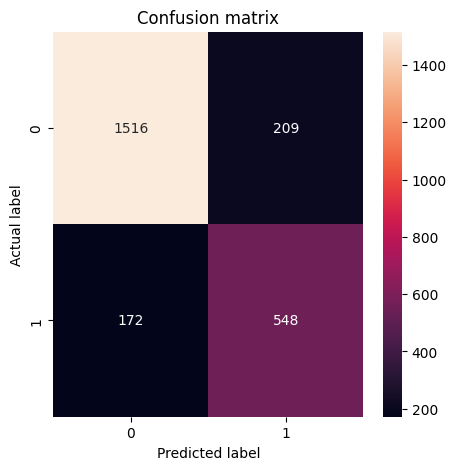

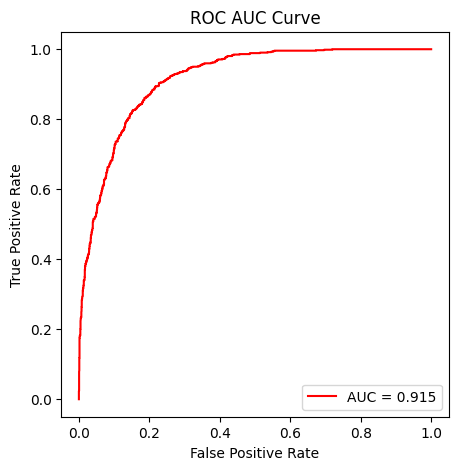

In [ ]:
model = XGBClassifier(**xgb_clf.best_params_)
describe_model(model, "XGBClassifier")

Hasil dari model XGBoost sesudah tuning hyperparameter menunjukan sedikit peningkatan pada akurasi model

Confusion matrix menunkukan kesalahan 172 dan 209 pada prediksi

Skor AUC menunjukan hasil yang bagus dengan skor 0.915

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1725
         1.0       0.74      0.74      0.74       720

    accuracy                           0.85      2445
   macro avg       0.82      0.82      0.82      2445
weighted avg       0.85      0.85      0.85      2445

Accuracy : 0.8482617586912066
ROC AUC : 0.9164194847020934


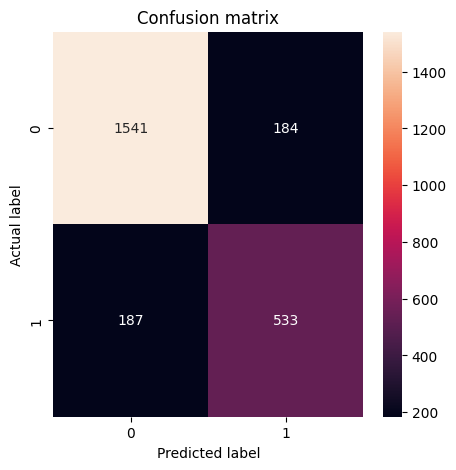

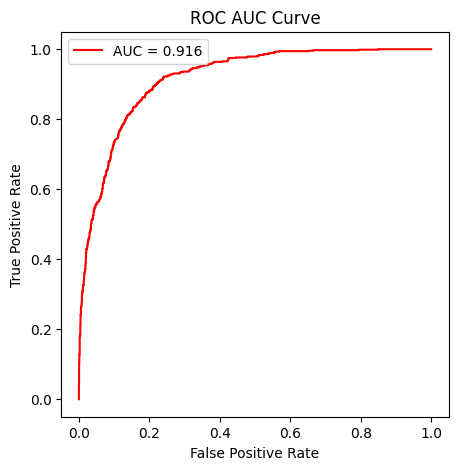

In [ ]:
model = SVC(**svc_clf.best_params_, probability=True)
describe_model(model, 'SVC')

Hasil dari model SVC sesudah tuning hyperparameter tidak menunjukan peningkatan pada akurasi model

Confusion matrix menunkukan kesalahan 187 dan 184 pada prediksi

Skor AUC menunjukan hasil yang bagus dengan skor 0.918

<Axes: >

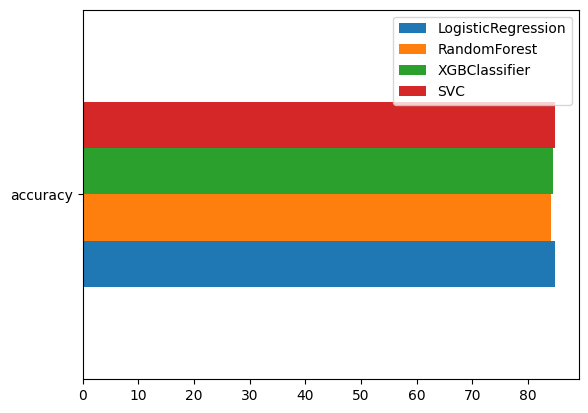

In [ ]:
accuracies.plot(kind='barh')

In [ ]:
accuracies

,LogisticRegression,RandomForest,XGBClassifier,SVC
accuracy,84.826176,84.130879,84.417178,84.826176


# Summary

- Model **Logistic Regression** dan **SVC** mendapatkan nilai yang hampir sama dengan akurasi 84.8%, untuk skor AUC Logistic regression lebih tinggi dengan skor 0.918
- Setelah menggunakan Grid Search untuk hyperparameter tuning hanya 2 model saja yang mendapat peningkatan akurasi, itupun hanya sedikit
- Untuk meningkatkan accuracy model mungkin bisa dilakukan feature selection ataupun feature extraction pada beberapa fitur
- Untuk mengatasi imbalance data dapat juga dilakukan dengan Class Weighting